In [1]:
from sklearn import datasets
iris = datasets.load_iris()

In [2]:
import pandas as pd
X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
y = pd.DataFrame(iris.target)
y.columns = ['Targets']
df = pd.concat([X, y], axis=1)
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Targets
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


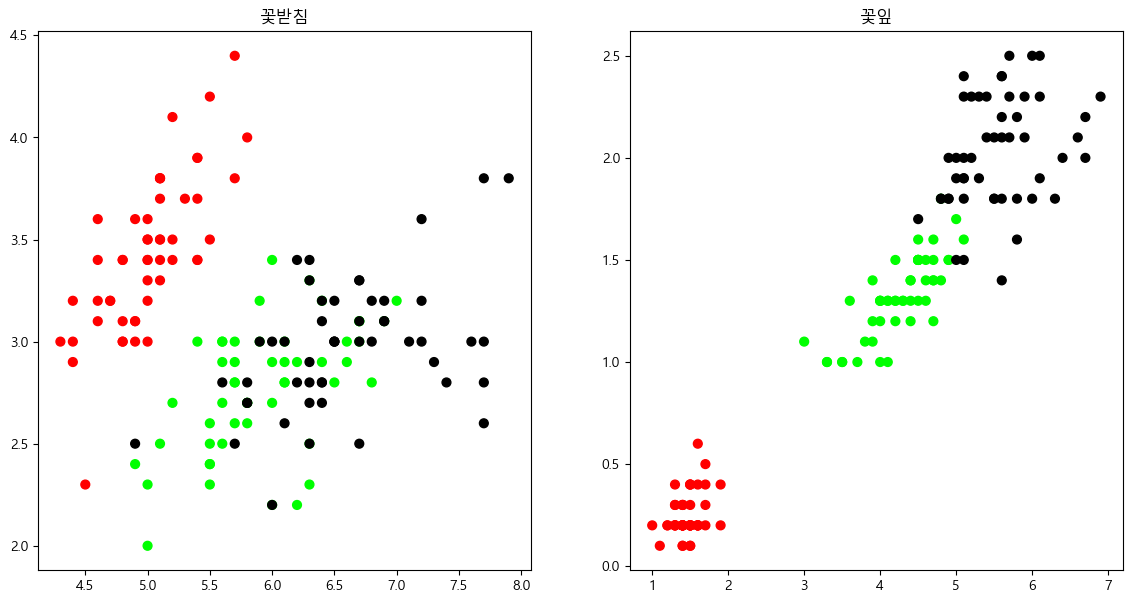

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
# 한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

plt.figure(figsize=(14,7))
colormap = np.array(['red', 'lime', 'black'])

# 꽃받침 기준 그래프
plt.subplot(1, 2, 1)
plt.scatter(X.Sepal_Length, X.Sepal_Width, c=colormap[y.Targets], s=40)
plt.title('꽃받침')

# 꽃잎 기준 그래프
plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('꽃잎')
plt.show()

In [4]:
#KMeans Cluster 모델 생성(클러스터 3개)
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=0)
model.fit(X)

KMeans(n_clusters=3, random_state=0)

In [5]:
#clustering 결과
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

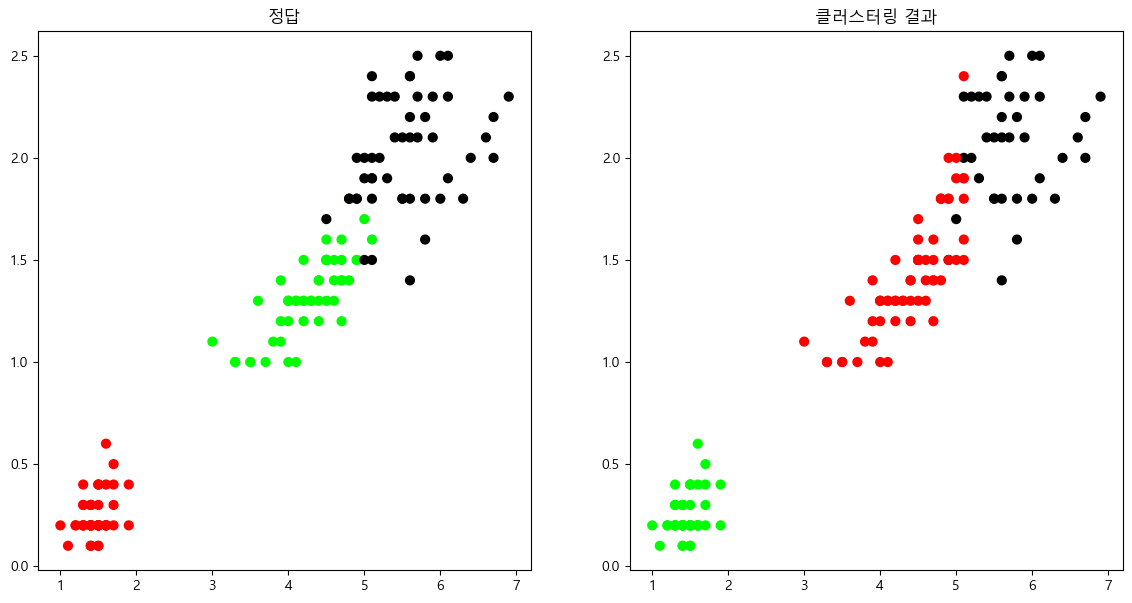

In [6]:
plt.figure(figsize=(14,7))
# 정답 그래프
plt.subplot(1, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('정답')

# 예측 그래프
plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('클러스터링 결과')
plt.show()

# kmeans 알고리즘은 정답을 미리 알려주지 않는 비지도학습이므로 색상이 다름
# 그룹이 잘 나누어지므로 라벨 번호는 중요하지 않음

In [7]:
# label순번 변경(0과 1을 서로 바꿈)
pred = np.choose(model.labels_, [1, 0, 2]).astype(np.int64)
print(model.labels_)
print(pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


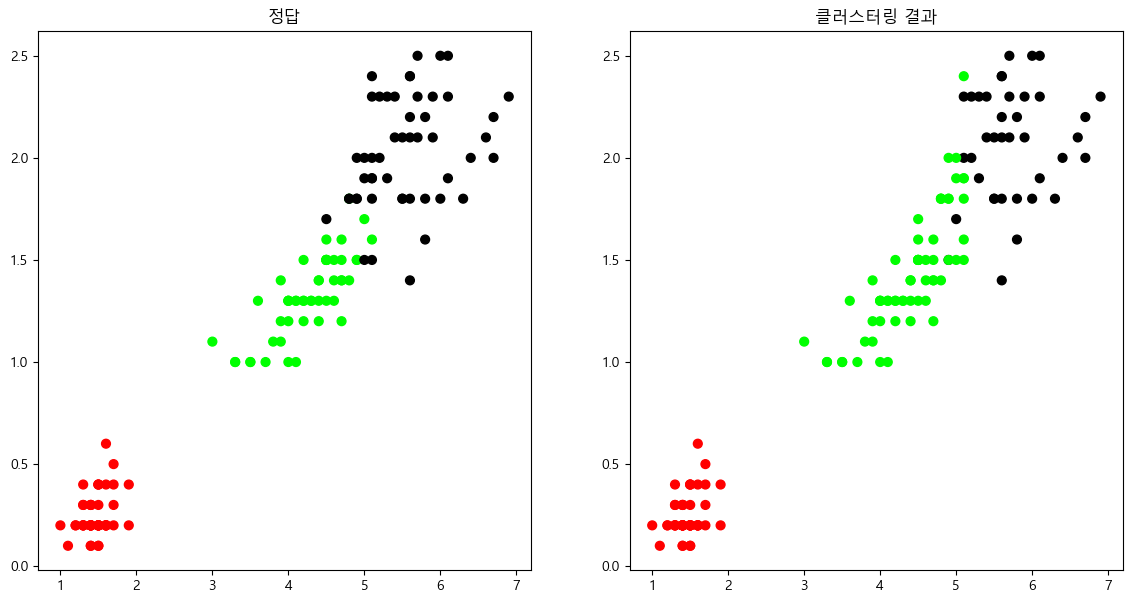

In [8]:
plt.figure(figsize=(14,7))
# 정답 그래프
plt.subplot(1, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('정답')

# 예측 그래프
plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[pred], s=40)
plt.title('클러스터링 결과')
plt.show()

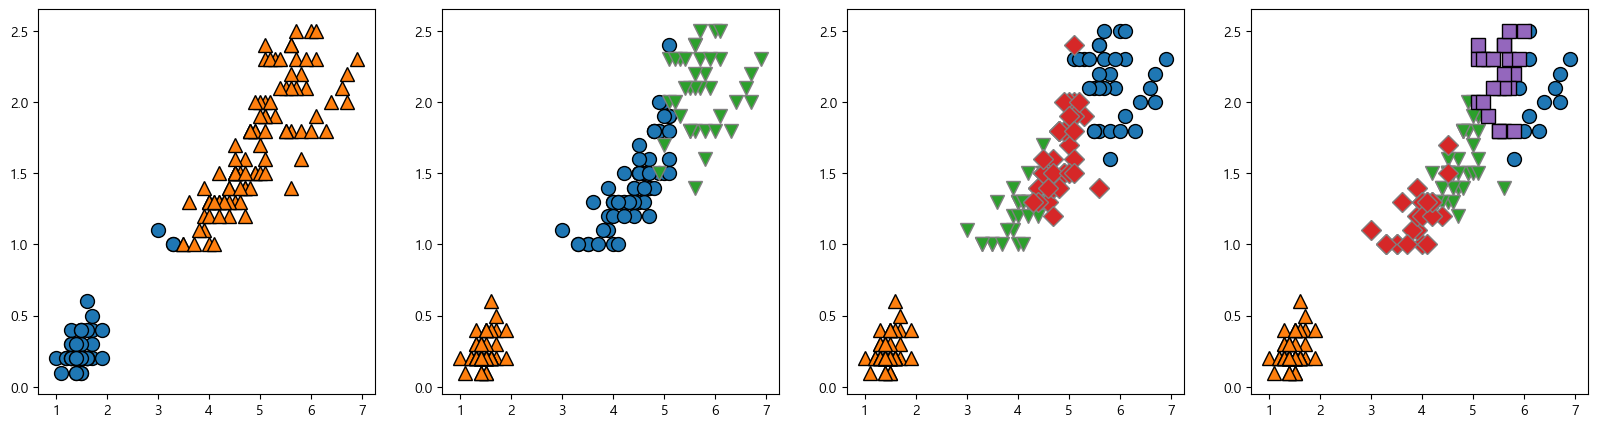

In [9]:
#k값에 따른 클러스터링 결과
import mglearn
# 1행 4열의 서브플롯 생성
fig, axes = plt.subplots(1, 4, figsize=(20,5))

# 2, 3, 4, 5개의 클러스터로 나눌 경우
idx = 0
for k in [2, 3, 4, 5]:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    lbls = kmeans.labels_
    mglearn.discrete_scatter(X['Petal_Length'], X['Petal_Width'], 
                             lbls, ax=axes[idx])
    idx += 1
plt.show()